# Part 1: Importing the libraries and loading dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import time
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_excel('/content/train-data.xlsx')
df.head()

,Sl.N,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,NaN,17.74


In [ ]:
df.nunique()

Sl.N                 6019
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               430
Engine                146
Power                 370
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [ ]:
df.head()

,Sl.N,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,NaN,17.74


In [ ]:
df.shape

(6019, 14)

In [ ]:
df.isnull().sum()

Sl.N                    0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
df.drop('New_Price', axis=1, inplace=True)
df = df.drop(df.columns[0], axis=1)

df.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74


In [ ]:
# Extract the brand and create a new column
df['Brand'] = df['Name'].str.split(' ', 1).str[0]

# Display the DataFrame
df.head()

<ipython-input-1046-635e958432d7>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Brand'] = df['Name'].str.split(' ', 1).str[0]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74,Audi


In [ ]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Brand                 0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
dtype: int64

In [ ]:
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')


In [ ]:
df['Brand'].nunique()

31

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
dtype: int64

# Part 2: Exploratory Data Analysis

## (a) Plotting Data types

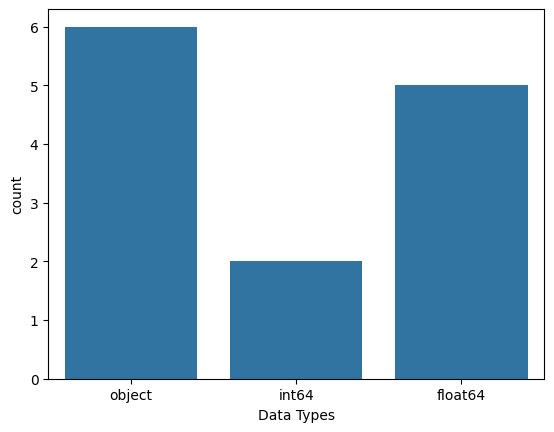

In [ ]:
dtypes_df = pd.DataFrame(df.dtypes, columns=['Data Types'])

# Create a count plot
sns.countplot(x='Data Types', data=dtypes_df)
plt.show()

In [ ]:
for column, dtype in zip(df.columns, df.dtypes):
    print(f"Column: {column}, Data Type: {dtype}")


Column: Name, Data Type: object
Column: Location, Data Type: object
Column: Year, Data Type: int64
Column: Kilometers_Driven, Data Type: int64
Column: Fuel_Type, Data Type: object
Column: Transmission, Data Type: object
Column: Owner_Type, Data Type: object
Column: Mileage, Data Type: float64
Column: Engine, Data Type: float64
Column: Power, Data Type: float64
Column: Seats, Data Type: float64
Column: Price, Data Type: float64
Column: Brand, Data Type: object


## (b) Summary of the dataset

In [ ]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


## (c) Univariate Analysis

 ### Numerical Values

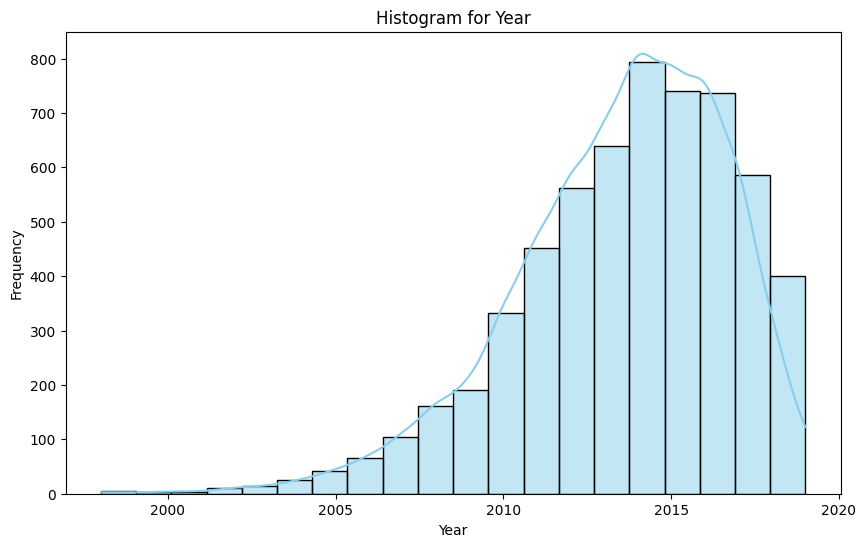

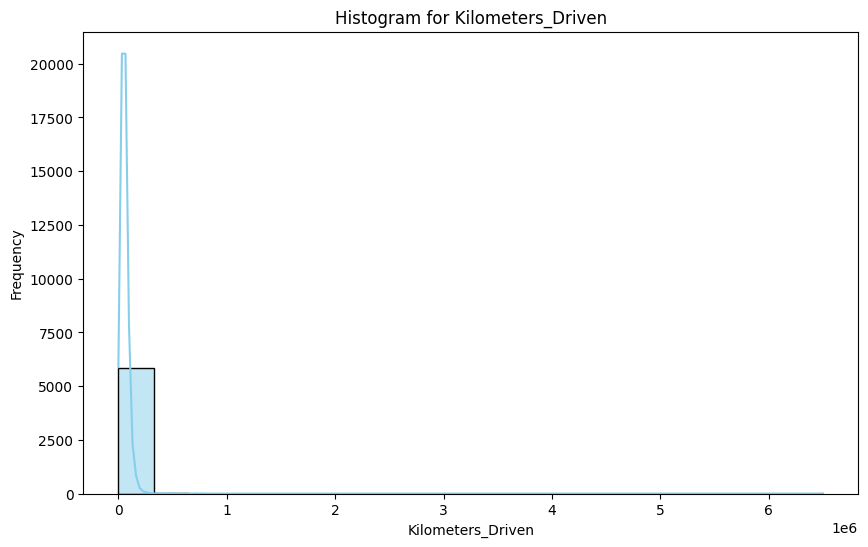

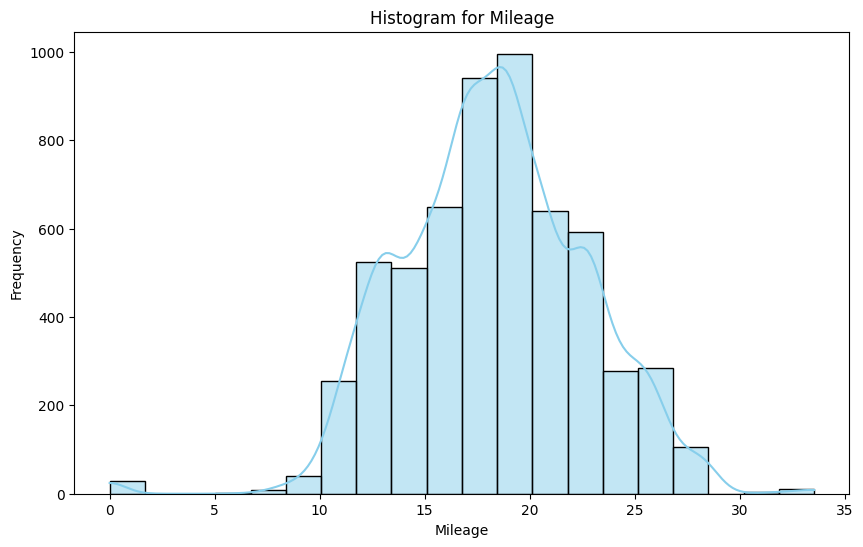

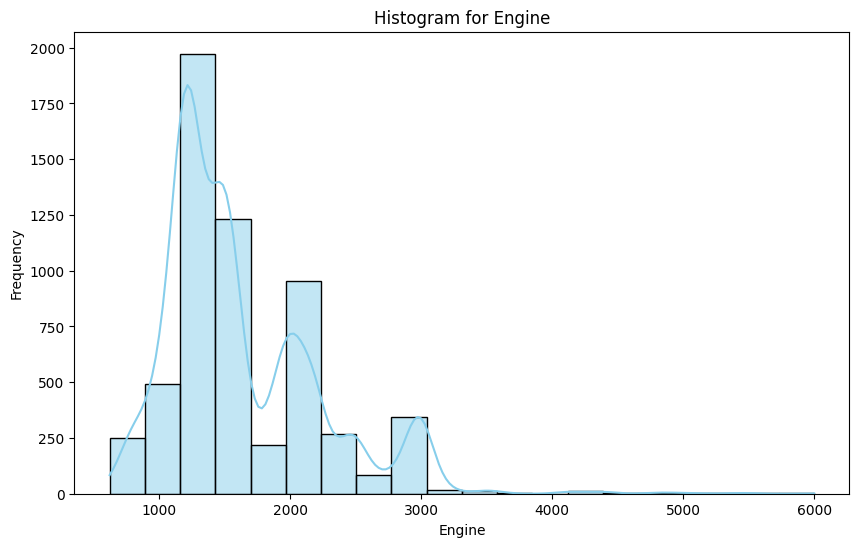

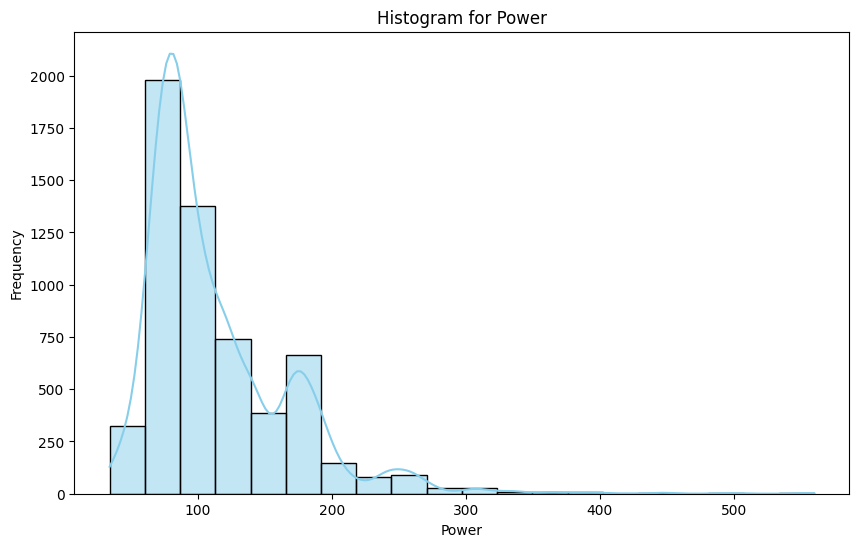

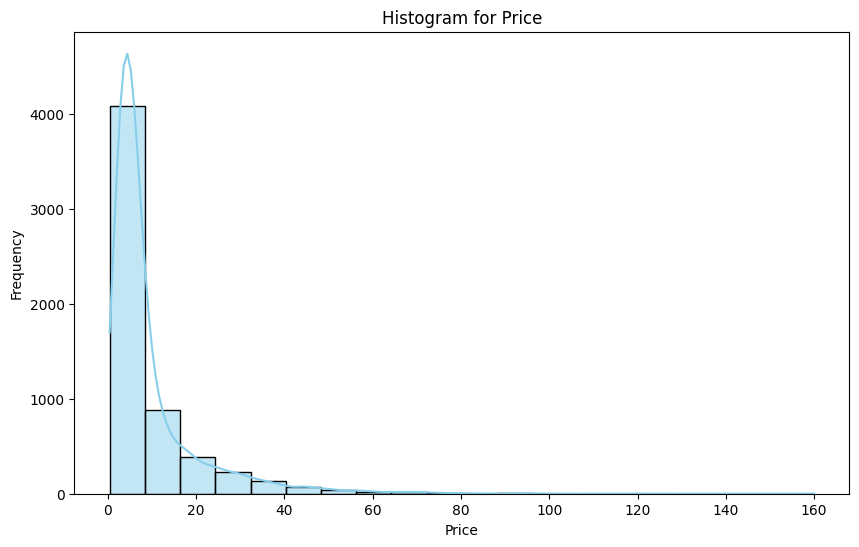

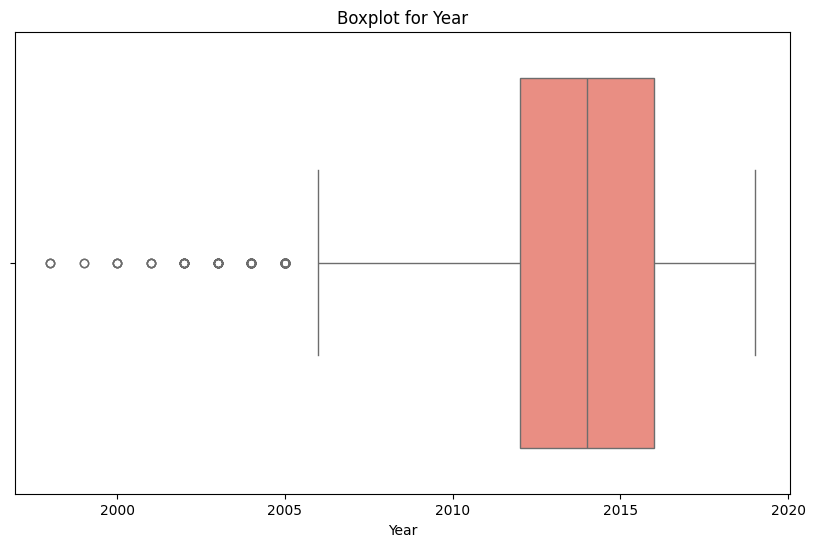

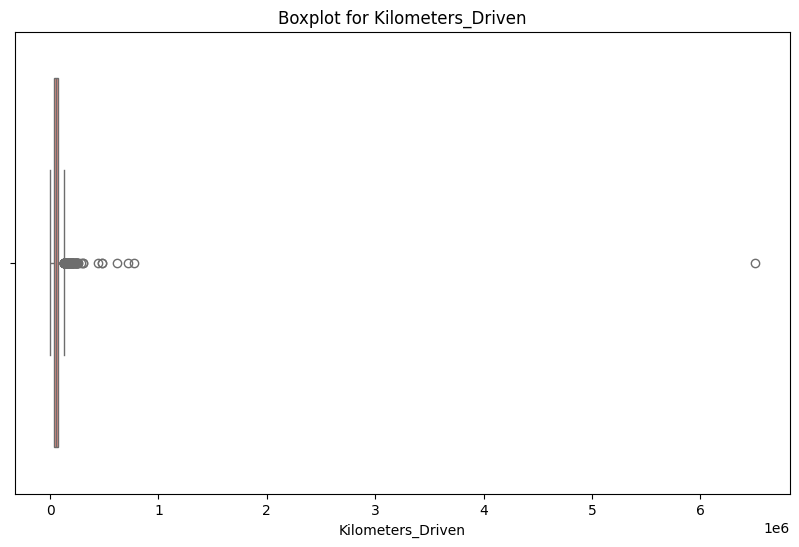

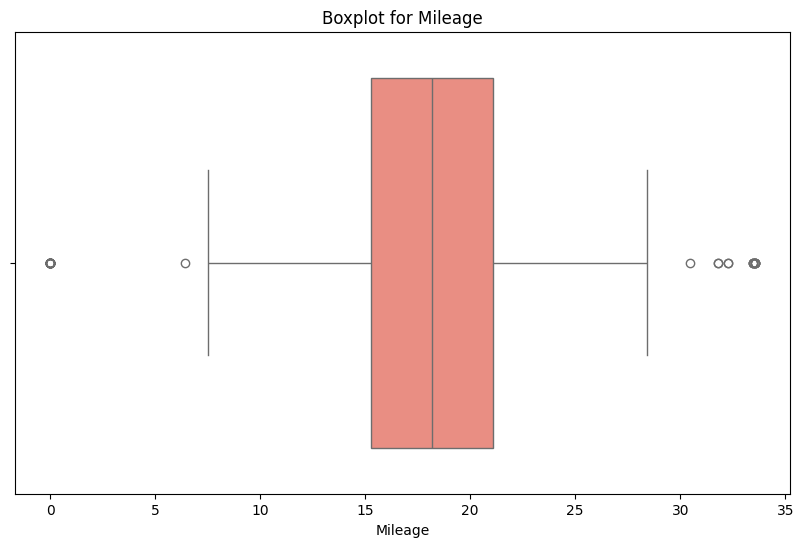

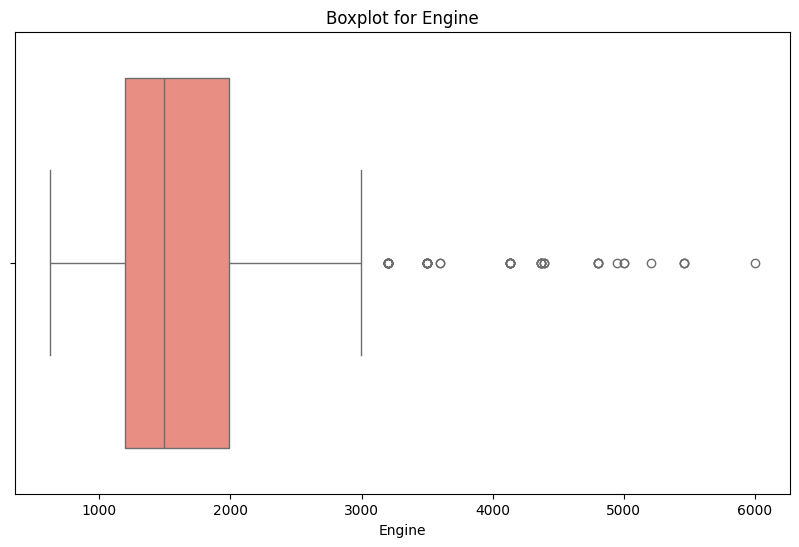

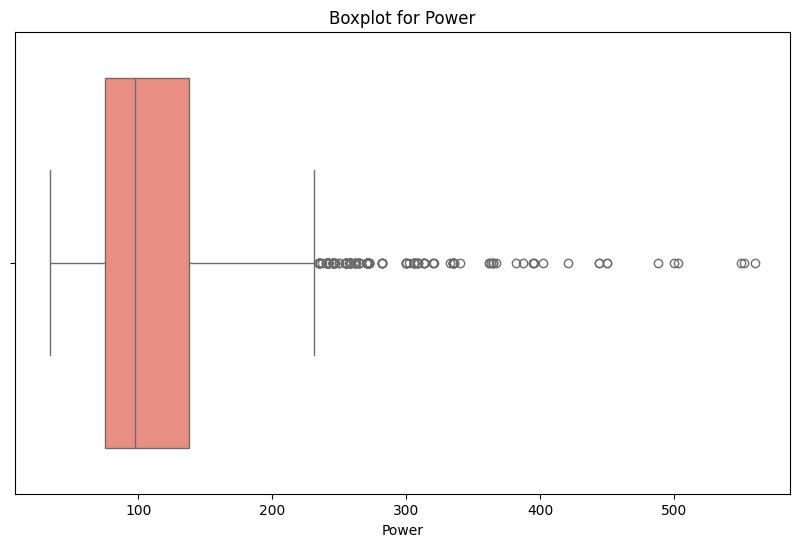

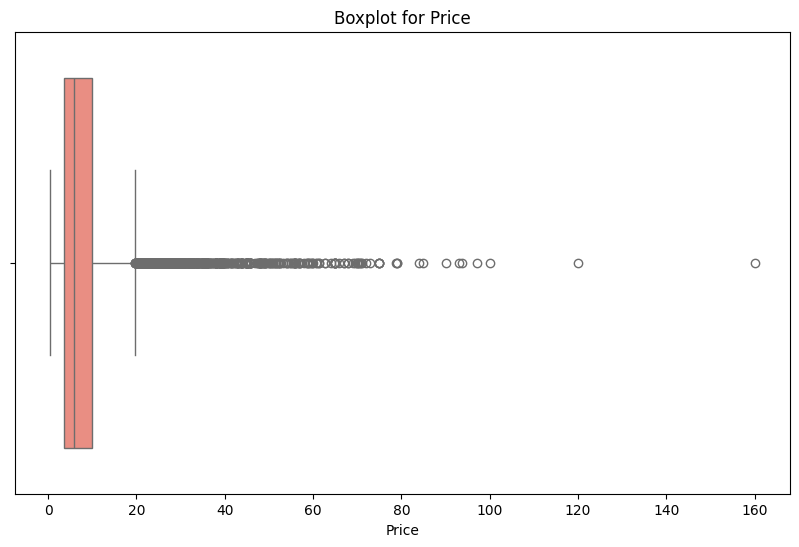

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Load your data if not already loaded
# df = pd.read_csv('your_data.csv')

# Numeric columns
numeric_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']

# Plot histograms for numeric columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Identify and handle outliers
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column], color='salmon')
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

    # Identify outliers using IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Handle outliers by clipping values to the lower and upper bounds
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


### Categorical Values

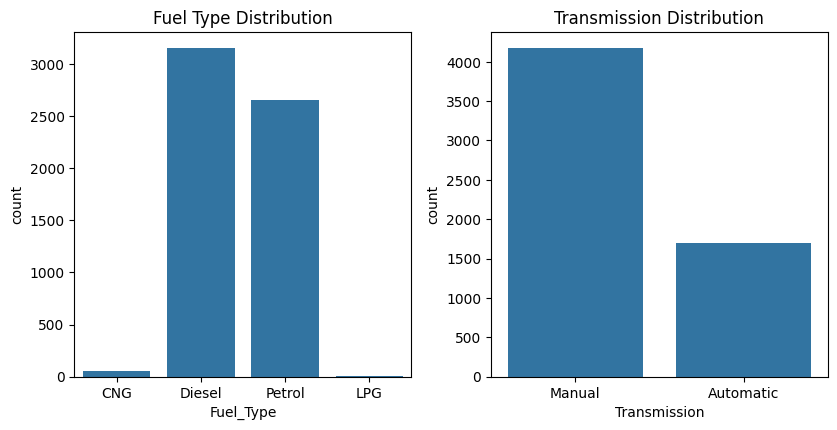

In [ ]:

# Plot bar charts for categorical columns
plt.figure(figsize=(12, 8))



# Bar chart for Fuel_Type
plt.subplot(2, 3, 2)
sns.countplot(x='Fuel_Type', data=df)
plt.title('Fuel Type Distribution')

# Bar chart for Transmission
plt.subplot(2, 3, 3)
sns.countplot(x='Transmission', data=df)
plt.title('Transmission Distribution')





plt.tight_layout()
plt.show()

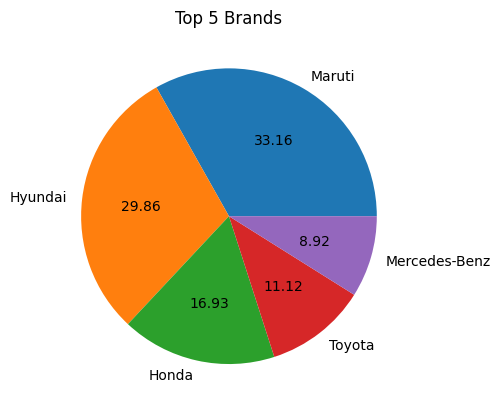

In [ ]:
brand_counts = df['Brand'].value_counts()
top_5_brands = brand_counts.head(5)
df_top_5 = df[df['Brand'].isin(top_5_brands.index)]
plt.pie(top_5_brands, labels=top_5_brands.index, autopct='%.2f')
plt.title('Top 5 Brands')
plt.show()

Text(0.5, 1.0, 'Year')

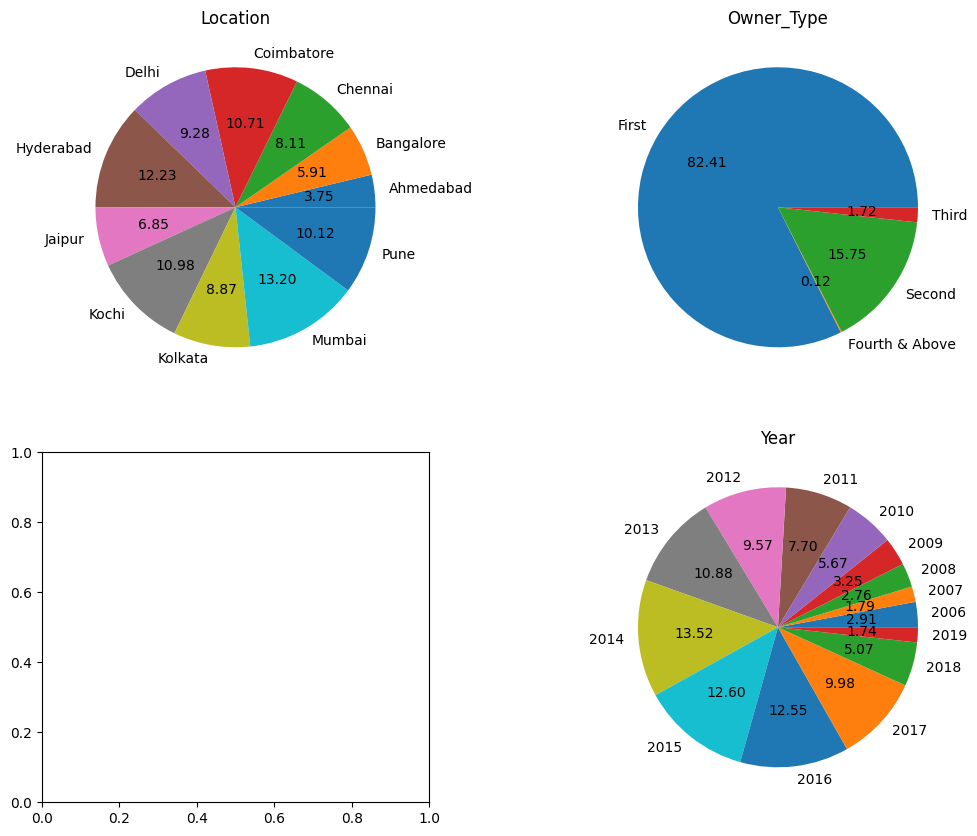

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plt.subplots_adjust(wspace=0.4)

df.groupby('Location').size().plot(kind='pie', autopct='%.2f', ax=axes[0, 0])
axes[0, 0].set_title('Location')

df.groupby('Owner_Type').size().plot(kind='pie', autopct='%.2f', ax=axes[0, 1])
axes[0, 1].set_title('Owner_Type')

df.groupby('Year').size().plot(kind='pie', autopct='%.2f', ax=axes[1, 1])
axes[1, 1].set_title('Year')



## (d) Distribution based on Transmission and Fuel type

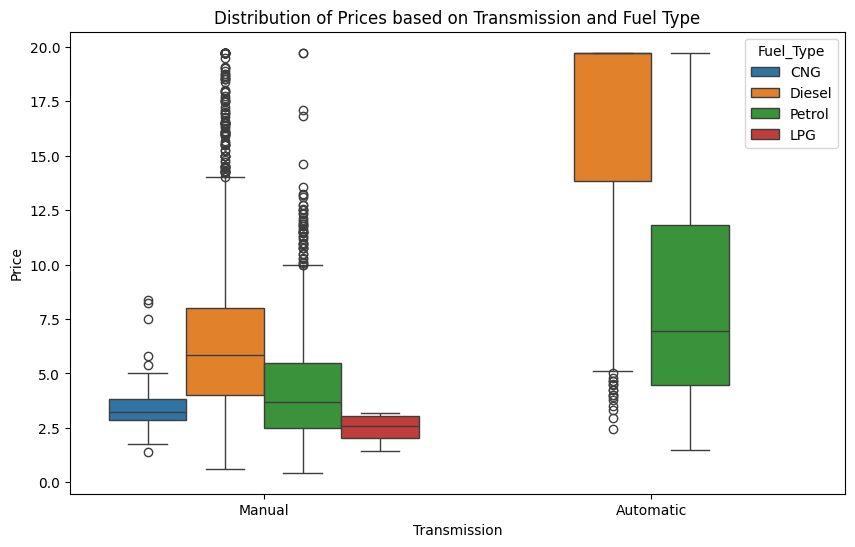

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price', hue='Fuel_Type', data=df)
plt.title('Distribution of Prices based on Transmission and Fuel Type')
plt.show()

### Relationship between Year, Kilometers and its Price Distribution

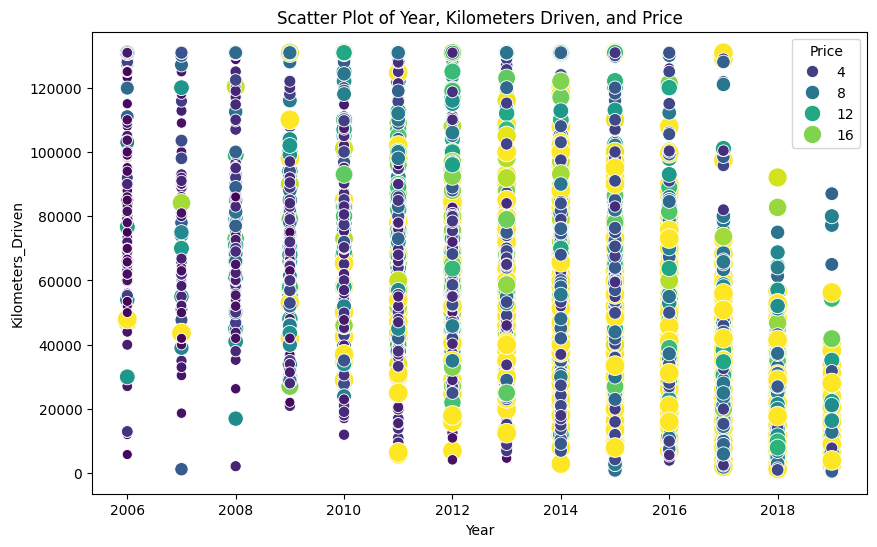

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Kilometers_Driven', size='Price', sizes=(50, 200), hue='Price', palette='viridis', data=df)
plt.title('Scatter Plot of Year, Kilometers Driven, and Price')
plt.show()

## Converting Categorical values

## (e) Bivariate Analysis

In [ ]:
le = LabelEncoder()
categorical_columns = ['Brand','Location', 'Owner_Type', 'Fuel_Type','Transmission']

# Apply LabelEncoder to each column
for column in categorical_columns:
    df[column] = df[column].astype(str)
    df[column] = le.fit_transform(df[column])

<ipython-input-1063-f6f2145cd75c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


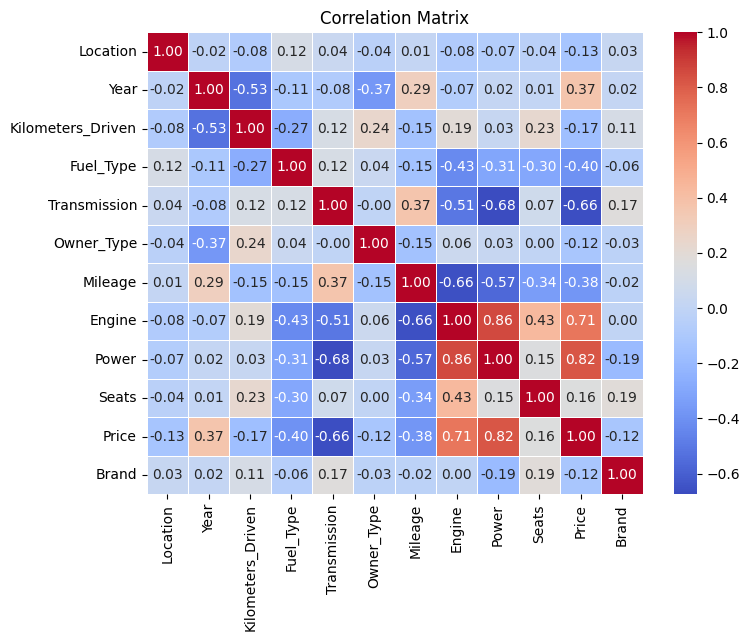

In [ ]:
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Part 3: Training the model

In [ ]:
correlation_matrix = df.corr()
term_deposit_correlations = correlation_matrix['Price'].sort_values(ascending=False)

# Display the variables strongly related to 'Term Deposit'
print("Variables strongly related to Price:")
print(term_deposit_correlations)

Variables strongly related to Price:
Price                1.000000
Power                0.817767
Engine               0.713199
Year                 0.367308
Seats                0.159784
Owner_Type          -0.122114
Brand               -0.124629
Location            -0.129689
Kilometers_Driven   -0.165773
Mileage             -0.377774
Fuel_Type           -0.396661
Transmission        -0.662181
Name: Price, dtype: float64


<ipython-input-1064-dae7c4343e42>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


### (a) Splitting the Data

In [ ]:
X = df.drop(columns=['Name','Price'])
y = df['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
365,10,2017,8350.000,3,1,0,13.80,1998.0,192.00,5.0,20
1410,9,2017,22000.000,3,1,0,18.88,999.0,123.24,5.0,8
1002,3,2012,54957.000,3,0,0,17.10,1591.0,121.40,5.0,10
2238,5,2008,130873.125,3,1,2,13.50,1799.0,130.00,5.0,9
5555,4,2010,75319.000,3,1,2,21.10,1197.0,85.80,5.0,18


### Performing Standard Scaler because we have outliers in our dataset and we cant omit the outliers

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [ ]:
print("X train: ",X_train.shape)
print("X test: ",X_test.shape)

print("Y train: ",y_train.shape)
print("Y test: ",y_test.shape)

X train:  (4697, 11)
X test:  (1175, 11)
Y train:  (4697,)
Y test:  (1175,)


# Part 4: Model Evaluation

In [ ]:
classifiers = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1),
    "Lasso":Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=18),
    }

In [ ]:
no_classifiers = len(classifiers.keys())

def batch_classify(X_train, Y_train,X_test, y_test, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,4)), columns = ['classifier', 'train_score','val_score', 'training_time'])
    count = 0
    for key, classifier in classifiers.items():
        t_start = time.perf_counter()
        classifier.fit(X_train, y_train)
        t_end = time.perf_counter()
        t_diff = t_end - t_start

        train_score = classifier.score(X_train, Y_train)
        val_score = classifier.score(X_test, y_test)

        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'val_score'] = val_score
        df_results.loc[count,'training_time'] = t_diff
        # if verbose:
            # print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [ ]:
df_results = batch_classify(X_train, y_train, X_test, y_test)
print(df_results.sort_values(by='train_score', ascending=False))

          classifier  train_score  val_score  training_time
3      Random Forest     0.990307   0.941620       0.515700
0  Linear Regression     0.836898   0.840088       0.003838
1              Ridge     0.836898   0.840091       0.005549
2              Lasso     0.834679   0.836405       0.010291


In [ ]:
for model_name, model in classifiers.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print results
    print(f"Model: {model_name}")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print("-" * 30)

Model: Linear Regression
R-squared: 0.8401
Mean Squared Error: 5.2733
Mean Absolute Error: 1.7187
------------------------------
Model: Ridge
R-squared: 0.8401
Mean Squared Error: 5.2732
Mean Absolute Error: 1.7186
------------------------------
Model: Lasso
R-squared: 0.8364
Mean Squared Error: 5.3947
Mean Absolute Error: 1.7247
------------------------------
Model: Random Forest
R-squared: 0.9378
Mean Squared Error: 2.0513
Mean Absolute Error: 0.8956
------------------------------


# Part 5: HyperTuning using GridSearch method

### Saving the best Model

In [ ]:
import pickle

# Define classifiers
classifiers = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(),
}

# Define hyperparameter grids for each classifier
param_grids = {
    "Linear Regression": {},
    "Ridge": {"alpha": [0.1, 1, 10]},
    "Lasso": {"alpha": [0.01, 0.1, 1]},
    "Random Forest": {"n_estimators": [10, 50, 100], "max_depth": [None, 10, 20]},
}

# Perform Grid Search for each classifier
best_models = {}  # To store the best models

for model_name, model in classifiers.items():
    param_grid = param_grids.get(model_name, {})  # Use get() to handle the case when there's no param_grid
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)  # 5 folds for the dataset
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model  # Store the best model

    # Print best hyperparameters and evaluate on the test set
    best_params = grid_search.best_params_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name}")
    print("Best Hyperparameters:", best_params)
    print("R-squared:", r2)
    print("Mean Squared Error (MSE):", mse)

# Save the best models to pickle files
for model_name, best_model in best_models.items():
    with open(f'{model_name}_best_model.pkl', 'wb') as file:
        pickle.dump(best_model, file)



Linear Regression
Best Hyperparameters: {}
R-squared: 0.8400875146041863
Mean Squared Error (MSE): 5.273278959978938

Ridge
Best Hyperparameters: {'alpha': 10}
R-squared: 0.8401160852544575
Mean Squared Error (MSE): 5.272336813350577

Lasso
Best Hyperparameters: {'alpha': 0.01}
R-squared: 0.8399468831076095
Mean Squared Error (MSE): 5.277916428467864

Random Forest
Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}
R-squared: 0.9413442921069504
Mean Squared Error (MSE): 1.9342323993620238


# Part 5: Model Prediction

In [ ]:
model=pickle.load(open('Random Forest_best_model.pkl','rb'))

In [ ]:
df_test = pd.read_csv('test-data.csv')
df_test['Power'] = pd.to_numeric(df['Power'], errors='coerce')

df_test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.16,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,126.20,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,88.70,7.0,25.27
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,88.76,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,140.80,5.0,NaN


In [ ]:
df_test.shape

(1234, 13)

In [ ]:
# Extract the brand and create a new column
df_test['Brand'] = df_test['Name'].str.split(' ', 1).str[0]

# Display the DataFrame
df_test.head(5)

<ipython-input-1117-d8b679fb74c5>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_test['Brand'] = df_test['Name'].str.split(' ', 1).str[0]


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.16,4.0,NaN,Maruti
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,126.20,5.0,NaN,Maruti
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,88.70,7.0,25.27,Toyota
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,88.76,5.0,NaN,Toyota
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,140.80,5.0,NaN,Hyundai


In [ ]:
df_test.drop('New_Price', axis=1, inplace=True)
df_test = df_test.drop(df_test.columns[0], axis=1)
df_test.dropna(inplace=True)

df_test.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.16,4.0,Maruti
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,126.20,5.0,Maruti
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,88.70,7.0,Toyota
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,88.76,5.0,Toyota
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,140.80,5.0,Hyundai


In [ ]:
df_test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Brand                0
dtype: int64

In [ ]:
df_test.shape

(1190, 12)

# EDA on testing data

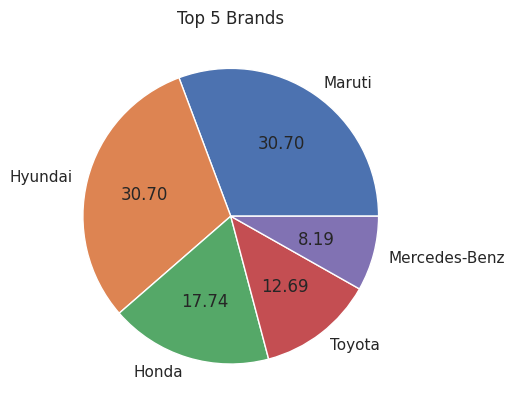

In [ ]:
brand_counts = df_test['Brand'].value_counts()
top_5_brands = brand_counts.head(5)
df_top_5 = df_test[df_test['Brand'].isin(top_5_brands.index)]
plt.pie(top_5_brands, labels=top_5_brands.index, autopct='%.2f')
plt.title('Top 5 Brands')
plt.show()

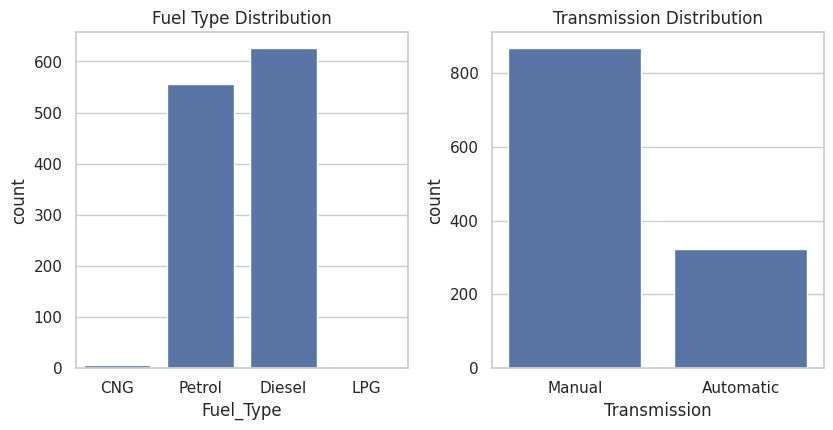

In [ ]:

# Plot bar charts for categorical columns
plt.figure(figsize=(12, 8))



# Bar chart for Fuel_Type
plt.subplot(2, 3, 2)
sns.countplot(x='Fuel_Type', data=df_test)
plt.title('Fuel Type Distribution')

# Bar chart for Transmission
plt.subplot(2, 3, 3)
sns.countplot(x='Transmission', data=df_test)
plt.title('Transmission Distribution')





plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Year')

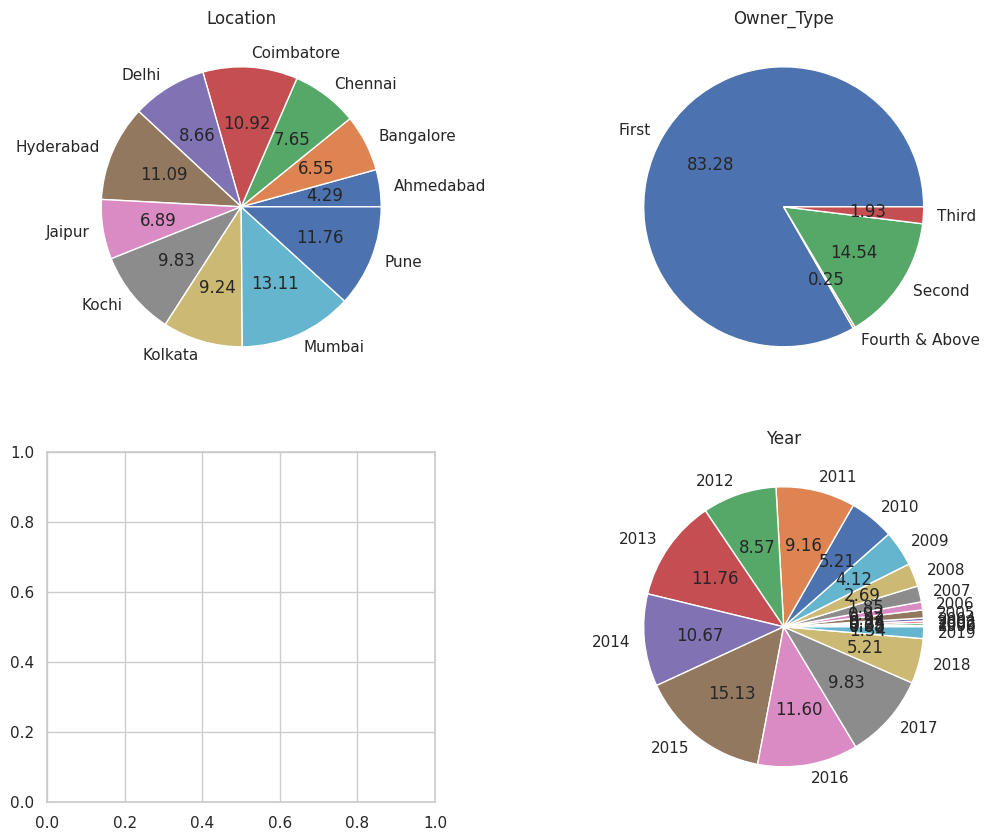

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plt.subplots_adjust(wspace=0.4)

df_test.groupby('Location').size().plot(kind='pie', autopct='%.2f', ax=axes[0, 0])
axes[0, 0].set_title('Location')

df_test.groupby('Owner_Type').size().plot(kind='pie', autopct='%.2f', ax=axes[0, 1])
axes[0, 1].set_title('Owner_Type')

df_test.groupby('Year').size().plot(kind='pie', autopct='%.2f', ax=axes[1, 1])
axes[1, 1].set_title('Year')



### Converting categorical to numerical values

In [ ]:
le = LabelEncoder()
categorical_columns = ['Brand','Location', 'Owner_Type', 'Fuel_Type','Transmission']

# Apply LabelEncoder to each column
for column in categorical_columns:
    df_test[column] = df_test[column].astype(str)
    df_test[column] = le.fit_transform(df_test[column])


In [ ]:
for column, dtype in zip(df_test.columns, df_test.dtypes):
    print(f"Column: {column}, Data Type: {dtype}")


Column: Name, Data Type: object
Column: Location, Data Type: int64
Column: Year, Data Type: int64
Column: Kilometers_Driven, Data Type: int64
Column: Fuel_Type, Data Type: int64
Column: Transmission, Data Type: int64
Column: Owner_Type, Data Type: int64
Column: Mileage, Data Type: float64
Column: Engine, Data Type: float64
Column: Power, Data Type: float64
Column: Seats, Data Type: float64
Column: Brand, Data Type: int64


In [ ]:
model=pickle.load(open('Random Forest_best_model.pkl','rb'))
df_test['Price']=model.predict(df_test.loc[:, [ 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Brand']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
print(df_test['Price'])

0       12.787275
1       11.003550
2       10.973550
3       10.973550
4       10.973550
          ...    
1229    10.973550
1230    10.973550
1231    10.973550
1232    11.003550
1233    10.973550
Name: Price, Length: 1190, dtype: float64


In [ ]:
df_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Price
0,Maruti Alto K10 LXI CNG,4,2014,40929,0,1,0,32.26,998.0,58.16,4.0,16,12.787275
1,Maruti Alto 800 2016-2019 LXI,3,2013,54493,3,1,2,24.70,796.0,126.20,5.0,16,11.003550
2,Toyota Innova Crysta Touring Sport 2.4 MT,9,2017,34000,1,1,0,13.68,2393.0,88.70,7.0,26,10.973550
3,Toyota Etios Liva GD,5,2012,139000,1,1,0,23.59,1364.0,88.76,5.0,26,10.973550
4,Hyundai i20 Magna,9,2014,29000,3,1,0,18.50,1197.0,140.80,5.0,9,10.973550
